<ul>
<li>Nama   : Muhammad Nabil Fadhlurrahman </li>
<li>Nim    : 10119065</li>
<li>Tanggal: Minggu, 8 Nov 2020</li>
<li>Jurusan: Matematika</li>
<li>Sumber Data : Melakukan survey sendiri</li>
</ul>

In [ ]:
'''
Data yang digunakan merupakan data hasil survey pribadi.dengan pertanyaan sebagai berikut ....
'Nama (Inisial)', 'Jenis Kelamin',
       'Fakultas/Jurusan (Untuk TPB ITB isi jurusan dengan TPB ITB)',
       'Tahun ke berapa di kuliah?', 'Asal Universitas', 'Domisili',
       'Berapa lama Anda menghabiskan waktu untuk belajar dalam sehari selain pada waktu kuliah?',
       'Berapa persen materi yang diberikan saat pembelajaran sinkron yang disimak oleh Anda? (Pembelajaran tatap muka, contoh : gmeet, webinar, dll)',
       'Berapa persen materi yang diberikan saat pembelajaran asinkron yang disimak oleh Anda? (Pembelajaran mandiri tanpa ada interaksi langsung dengan pemateri, contoh : video youtube, modul perkuliahan)',
       'Seberapa sulit materi kuliah yang diberikan?',
       'Seberapa sering diberikan Tugas/PR/Kuis?',
       'Seberapa mudah akses materi perkuliahan lewat platform LMS? ',
       'Berapa lama dalam sehari Anda melakukan kegiatan di luar akademik? (Kegiatan organisasi baik di UKM atau himpunan)',
       'Apakah ketersediaan kuota/Internet cukup memadai untuk menunjang kegiatan pembelajaran?',
       'Berapa lama Anda menghabiskan waktu untuk istirahat dalam sehari saat waktu kuliah',
       'Pada jam berapa Anda biasanya tidur di waktu malam saat waktu kuliah?'],
      
      Yang nantinya data ini akan di klaster sesuai jawaban yang ada... 
      Tujuan dari survey ini sebenernya ingin membuat sebuah model prediksi pemahaman mahasiswa saat pembelajaran online dengan beberapa variable yang di jadikan sebagai variable prediktor...
      Bisa digunakan untuk berintrokspeksi. Tentunya penelitian dan pemodelan ini memiliki banyak sekali asumsi...

      Kesimpuan :
      model ini belum cukup baik memprediksi, kedepan akan dilakukan pengamatan lebih dan mendalam terkait model prediksi kita
'''

# **Survey Kegiatan Belajar Online**

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## **Data Processing**

### Pre-Cleaning Data

In [87]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRmspUge3sARqEcPP9QeuR6LhLzDZyRxoP8OC5wRVq92uv9LrCOn_w-Df-hlsmYo_6VltKrIgiWf6Bf/pub?output=csv')
df

,Timestamp,Nama (Inisial),Jenis Kelamin,Fakultas/Jurusan (Untuk TPB ITB isi jurusan dengan TPB ITB),Tahun ke berapa di kuliah?,Asal Universitas,Domisili,Berapa lama Anda menghabiskan waktu untuk belajar dalam sehari selain pada waktu kuliah?,"Berapa persen materi yang diberikan saat pembelajaran sinkron yang disimak oleh Anda? (Pembelajaran tatap muka, contoh : gmeet, webinar, dll)","Berapa persen materi yang diberikan saat pembelajaran asinkron yang disimak oleh Anda? (Pembelajaran mandiri tanpa ada interaksi langsung dengan pemateri, contoh : video youtube, modul perkuliahan)",Seberapa sulit materi kuliah yang diberikan?,Seberapa sering diberikan Tugas/PR/Kuis?,Seberapa mudah akses materi perkuliahan lewat platform LMS?,Berapa lama dalam sehari Anda melakukan kegiatan di luar akademik? (Kegiatan organisasi baik di UKM atau himpunan),Apakah ketersediaan kuota/Internet cukup memadai untuk menunjang kegiatan pembelajaran?,Berapa lama Anda menghabiskan waktu untuk istirahat dalam sehari saat waktu kuliah,Pada jam berapa Anda biasanya tidur di waktu malam saat waktu kuliah?
0,05/11/2020 17:08:11,Ria,Perempuan,Matematika,2,ITB,Jawa Tengah,91 - 120 menit,81 - 100%,81% - 100%,2,3,4,151 - 180 menit,4,151 - 180 menit,22.00 - 23.00 WIB
1,05/11/2020 17:08:17,b,Laki-laki,FMIPA/Aktuaria,2,ITB,Jakarta,31 - 60 menit,61 - 80%,21 - 40%,4,3,3,61 - 90 menit,4,61 - 90 menit,00.00 - 01.00 WIB
2,05/11/2020 17:09:29,danzel,Laki-laki,Matematika,2,ITB,Cimahi,0 - 30 menit,21 - 40%,0 - 20%,2,4,5,61 - 90 menit,2,151 - 180 menit,20.00 - 21.00 WIB
3,05/11/2020 17:11:28,hfy,Perempuan,Aktuaria,2,ITB,Bandung,121 - 150 menit,0 - 20 %,81% - 100%,2,4,3,61 - 90 menit,5,151 - 180 menit,02.00 - 03.00 WIB
4,05/11/2020 17:16:53,AP,Laki-laki,FTTM/TG,2,ITB,"Denpasar, Bali",151 - 180 menit,61 - 80%,81% - 100%,2,5,5,151 - 180 menit,5,91 - 120 menit,02.00 - 03.00 WIB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,09/11/2020 7:38:14,T,Laki-laki,FMIPA/Tpb itb,1,Itb,Inderapura,61 - 90 menit,41 - 60%,61 - 80%,3,4,2,31 - 60 menit,2,31 - 60 menit,01.00 - 02.00 WIB
105,09/11/2020 11:34:33,Fayez Gatri,Laki-laki,FTMD/Teknik Mesin,2,Institut Teknologi Bandung,Tangerang Selatan,91 - 120 menit,21 - 40%,81% - 100%,2,5,3,61 - 90 menit,4,91 - 120 menit,00.00 - 01.00 WIB
106,09/11/2020 16:37:58,VH,Laki-laki,FMIPA/Aktuaria,2,ITB,Pontianak,91 - 120 menit,41 - 60%,41 - 60%,4,3,4,61 - 90 menit,5,61 - 90 menit,01.00 - 02.00 WIB
107,09/11/2020 16:48:59,Agung,Laki-laki,JTEIF/IF,3,ITERA,Bandar Lampung,121 - 150 menit,61 - 80%,41 - 60%,3,4,4,61 - 90 menit,3,31 - 60 menit,23.00 - 00.00 WIB


In [88]:
df.columns

Index(['Timestamp', 'Nama (Inisial)', 'Jenis Kelamin',
       'Fakultas/Jurusan (Untuk TPB ITB isi jurusan dengan TPB ITB)',
       'Tahun ke berapa di kuliah?', 'Asal Universitas', 'Domisili',
       'Berapa lama Anda menghabiskan waktu untuk belajar dalam sehari selain pada waktu kuliah?',
       'Berapa persen materi yang diberikan saat pembelajaran sinkron yang disimak oleh Anda? (Pembelajaran tatap muka, contoh : gmeet, webinar, dll)',
       'Berapa persen materi yang diberikan saat pembelajaran asinkron yang disimak oleh Anda? (Pembelajaran mandiri tanpa ada interaksi langsung dengan pemateri, contoh : video youtube, modul perkuliahan)',
       'Seberapa sulit materi kuliah yang diberikan?',
       'Seberapa sering diberikan Tugas/PR/Kuis?',
       'Seberapa mudah akses materi perkuliahan lewat platform LMS? ',
       'Berapa lama dalam sehari Anda melakukan kegiatan di luar akademik? (Kegiatan organisasi baik di UKM atau himpunan)',
       'Apakah ketersediaan kuota/Internet cu

In [89]:
df1 = df.drop(['Timestamp', 'Nama (Inisial)', 'Jenis Kelamin','Fakultas/Jurusan (Untuk TPB ITB isi jurusan dengan TPB ITB)','Domisili','Asal Universitas'],axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 11 columns):
 #   Column                                                                                                                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                 --------------  ----- 
 0   Tahun ke berapa di kuliah?                                                                                                                                                                             109 non-null    object
 1   Berapa lama Anda menghabiskan waktu untuk belajar dalam sehari selain pada waktu kuliah?                                                                                                               109 non-nu

In [90]:
df1.columns = ['tahun','belajar_diluar_kuliah','sinkron','asinkron','kesulitan','frekuensi_beban','kemudahan_akses','kegiatan_nonakademik','kuota','istirahat','jam_tidur']
df1

,tahun,belajar_diluar_kuliah,sinkron,asinkron,kesulitan,frekuensi_beban,kemudahan_akses,kegiatan_nonakademik,kuota,istirahat,jam_tidur
0,2,91 - 120 menit,81 - 100%,81% - 100%,2,3,4,151 - 180 menit,4,151 - 180 menit,22.00 - 23.00 WIB
1,2,31 - 60 menit,61 - 80%,21 - 40%,4,3,3,61 - 90 menit,4,61 - 90 menit,00.00 - 01.00 WIB
2,2,0 - 30 menit,21 - 40%,0 - 20%,2,4,5,61 - 90 menit,2,151 - 180 menit,20.00 - 21.00 WIB
3,2,121 - 150 menit,0 - 20 %,81% - 100%,2,4,3,61 - 90 menit,5,151 - 180 menit,02.00 - 03.00 WIB
4,2,151 - 180 menit,61 - 80%,81% - 100%,2,5,5,151 - 180 menit,5,91 - 120 menit,02.00 - 03.00 WIB
...,...,...,...,...,...,...,...,...,...,...,...
104,1,61 - 90 menit,41 - 60%,61 - 80%,3,4,2,31 - 60 menit,2,31 - 60 menit,01.00 - 02.00 WIB
105,2,91 - 120 menit,21 - 40%,81% - 100%,2,5,3,61 - 90 menit,4,91 - 120 menit,00.00 - 01.00 WIB
106,2,91 - 120 menit,41 - 60%,41 - 60%,4,3,4,61 - 90 menit,5,61 - 90 menit,01.00 - 02.00 WIB
107,3,121 - 150 menit,61 - 80%,41 - 60%,3,4,4,61 - 90 menit,3,31 - 60 menit,23.00 - 00.00 WIB


In [91]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   tahun                  109 non-null    object
 1   belajar_diluar_kuliah  109 non-null    object
 2   sinkron                109 non-null    object
 3   asinkron               109 non-null    object
 4   kesulitan              109 non-null    int64 
 5   frekuensi_beban        109 non-null    int64 
 6   kemudahan_akses        109 non-null    int64 
 7   kegiatan_nonakademik   109 non-null    object
 8   kuota                  109 non-null    int64 
 9   istirahat              109 non-null    object
 10  jam_tidur              109 non-null    object
dtypes: int64(4), object(7)
memory usage: 9.5+ KB


### Pemrosesan kolom Tahun

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

2    75
1    18
3    15
5     1
Name: tahun_int, dtype: int64

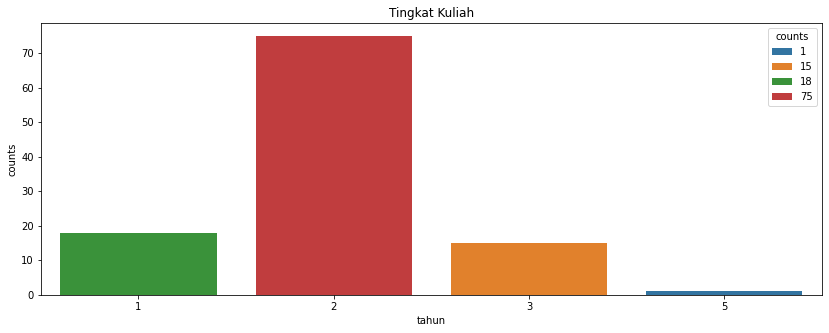

In [92]:
for i in range(len(df1['tahun'])):
  if type(df1['tahun'][i])==type('str'):
    df1['tahun'][i]= df1['tahun'][i].lower()

#Merubah Value kolom
for i in range(len(df1['tahun'])):
  if df1['tahun'][i] == '3' or df1['tahun'][i] == '2018' or df1['tahun'][i] == 'tahun ke 3' or df1['tahun'][i]=='1999' :
    df1['tahun'][i] = 3
  elif df1['tahun'][i] == '2' or df1['tahun'][i] == '2019' or df1['tahun'][i]=='duaaaa' or df1['tahun'][i]=='tahun ke 2' or df1['tahun'][i]=='kedua' or df1['tahun'][i]=='2,5':
    df1['tahun'][i] = 2
  elif df1['tahun'][i] =='2020':
    df1['tahun'][i] = 1
  else :
    df1['tahun'][i] = int(df1['tahun'][i])
df1['tahun_int'] =df1['tahun']
a = df1['tahun'].value_counts().rename_axis('tahun').reset_index(name='counts')
plt.figure(figsize=(14,5))
plt.title('Tingkat Kuliah')
sns.barplot(x='tahun',y='counts',data = a,hue='counts',dodge=False)
df1[df1['tahun']=='1999'] = 3
a = [int(i) for i in df1['tahun']]
df1['tahun_int'] = a
df1.tahun_int.value_counts()


Grafik diatas menunjukan jumlah pengisi survey untuk setiap tingkat Kuliah/ angkatan. Dapat disimpulkan diketahui bahwa pengisi survey banyak dari tingkat 2 atau angkatan ke 2019

### Pemrosesan kolom Kemudahan Akses

In [93]:
dic_kemudahan_akses = {
    'Kategori': [str(i) for i in range(1,6)],
    'Penjelasan':['Sangat sulit','Sulit','Sedang','Mudah','Sangat Mudah']
}
df_dic_kemudahan_akses = pd.DataFrame(dic_kemudahan_akses)
df_dic_kemudahan_akses

,Kategori,Penjelasan
0,1,Sangat sulit
1,2,Sulit
2,3,Sedang
3,4,Mudah
4,5,Sangat Mudah


,Kemudahan akses materi,counts
4,1,2
3,2,11
0,3,38
1,4,34
2,5,24


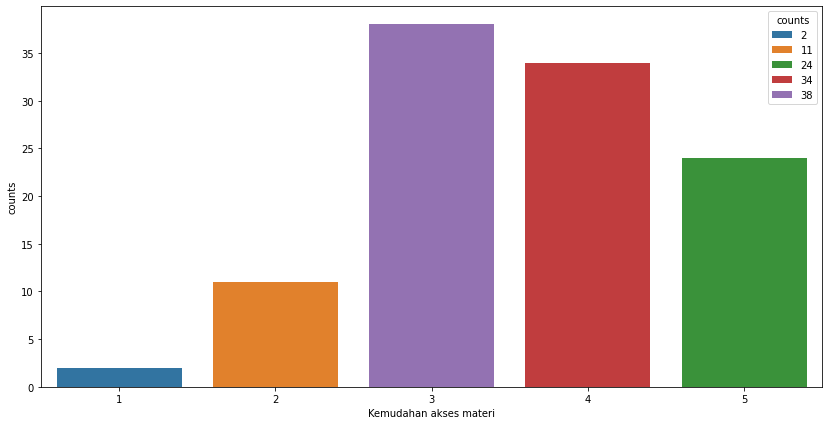

In [94]:
a = df1['kemudahan_akses'].value_counts().rename_axis('Kemudahan akses materi').reset_index(name='counts')
plt.figure(figsize=(14,7))
sns.barplot(x='Kemudahan akses materi',y='counts',data=a,hue='counts',dodge=False)
a.sort_values(by='Kemudahan akses materi')

Dari grafik antar katagori kemudahan mengakses materi, 1 sangat mudah dan 5 sangat susah. mayoritas merasa pengaksesan materi dapat di lakukan dengan sedang.Dapat dilihat juga distribusi datanya sedikit miring atau skew ke kiri. Banyak yang menganggap bahwa materi dapat diakses dengan mudah.

### Pemrosesan kolom Kuota


In [95]:
dic_kuota = {
    'Kategori': [str(i) for i in range(1,6)],
    'Penjelasan':['Sangat sedikit','Sedikit','Sedang','Banyak','Sangat Banyak']
}
df_dic_kuota = pd.DataFrame(dic_kemudahan_akses)
df_dic_kuota

,Kategori,Penjelasan
0,1,Sangat sulit
1,2,Sulit
2,3,Sedang
3,4,Mudah
4,5,Sangat Mudah


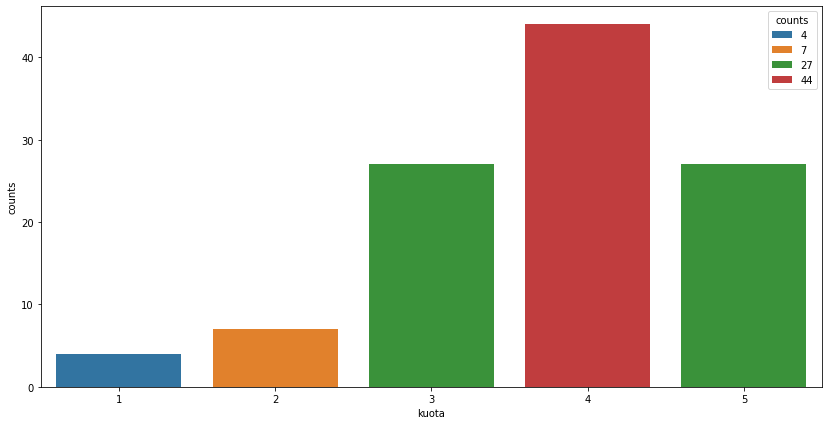

In [96]:
a = df1['kuota'].value_counts().rename_axis('kuota').reset_index(name='counts')
plt.figure(figsize=(14,7))
sns.barplot(x='kuota',y='counts',data=a,hue='counts',dodge=False)


Diatas merupakan grafik yang menampilkan bagaimana kuota yang dimiliki oleh pengisi suvey. Dapat di amati bahwa, mayoritas pengisi survey memiliki kemudahan/akses ke internet dengan banyak. yang ditandai dengan mayoritas dari mereka memiliki kuota yang banyak.

### Pemrosesan kolom lama waktu belajar diluar kuliah

In [97]:
dic_belajar_diluar_kuliah = {
    'Kategori': [str(i) for i in range(1,7)],
    'Penjelasan':['0 - 30 menit','31 - 60 menit','61 - 90 menit','91 - 120 menit','121 - 150 menit','151 - 180 menit']
}
df_dic_belaja_diluar_kuliah = pd.DataFrame(dic_belajar_diluar_kuliah)
df_dic_belaja_diluar_kuliah

,Kategori,Penjelasan
0,1,0 - 30 menit
1,2,31 - 60 menit
2,3,61 - 90 menit
3,4,91 - 120 menit
4,5,121 - 150 menit
5,6,151 - 180 menit


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-package

,Belajar diluar Jam Kuliah,counts
3,1,15
2,2,16
1,3,19
0,4,36
5,5,9
4,6,14


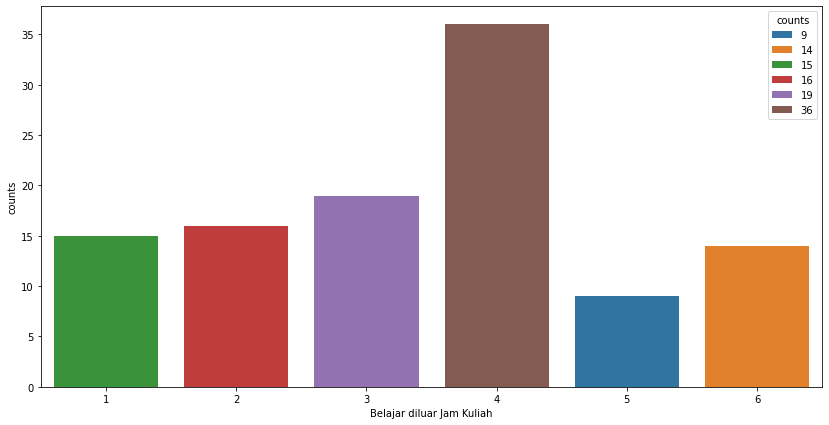

In [98]:

df1['belajar_diluar_kuliah'].value_counts()
for i in range(len(df1['belajar_diluar_kuliah'])):
  if df1['belajar_diluar_kuliah'][i] == '0 - 30 menit':
    df1['belajar_diluar_kuliah'][i] = 1
  elif df1['belajar_diluar_kuliah'][i] == '31 - 60 menit':
    df1['belajar_diluar_kuliah'][i] = 2
  elif df1['belajar_diluar_kuliah'][i] == '61 - 90 menit':
    df1['belajar_diluar_kuliah'][i] = 3
  elif df1['belajar_diluar_kuliah'][i] == '91 - 120 menit':
    df1['belajar_diluar_kuliah'][i] = 4
  elif df1['belajar_diluar_kuliah'][i] == '121 - 150 menit':
    df1['belajar_diluar_kuliah'][i] = 5
  elif df1['belajar_diluar_kuliah'][i]=='151 - 180 menit' or df1['belajar_diluar_kuliah'][i]=='-' or df1['belajar_diluar_kuliah'][i]=='Sampe Olab' or df1['belajar_diluar_kuliah'][i]=='Tidak menentu' or df1['belajar_diluar_kuliah'][i]=='Lebih dari 3 jam' :
    df1['belajar_diluar_kuliah'][i] = 6
df1['belajar_diluar_kuliah_int'] = df1['belajar_diluar_kuliah']
df1['belajar_diluar_kuliah_int'] = [int(i) for i in df1['belajar_diluar_kuliah']]

a = df1['belajar_diluar_kuliah'].value_counts().rename_axis('Belajar diluar Jam Kuliah').reset_index(name='counts')
plt.figure(figsize=(14,7))
sns.barplot(x='Belajar diluar Jam Kuliah',y='counts',data=a,dodge=False,hue='counts')
a.sort_values(by='Belajar diluar Jam Kuliah')

Diatas merupakan data grafik pengisi survey terkait berapa lama mereka belajar di luar jam kuliah. Mayoritas mahasiswa berada pada katagori 4 dalam waktu yang di gunakan untuk belajar diluar jam kuliah, selama 1 jam setengah sampai 2 jam. 

### Pemrosesan kolom sinkron

In [99]:
dic_sinkron = {
    'Kategori':[str(i) for i in range(1,6)],
    'Penjelasan':['0 - 20 %','21 - 40%','41 - 60%','61 - 80%','81 - 100%']
}
df_dic_sinkron = pd.DataFrame(dic_sinkron)
df_dic_sinkron

,Kategori,Penjelasan
0,1,0 - 20 %
1,2,21 - 40%
2,3,41 - 60%
3,4,61 - 80%
4,5,81 - 100%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-pa

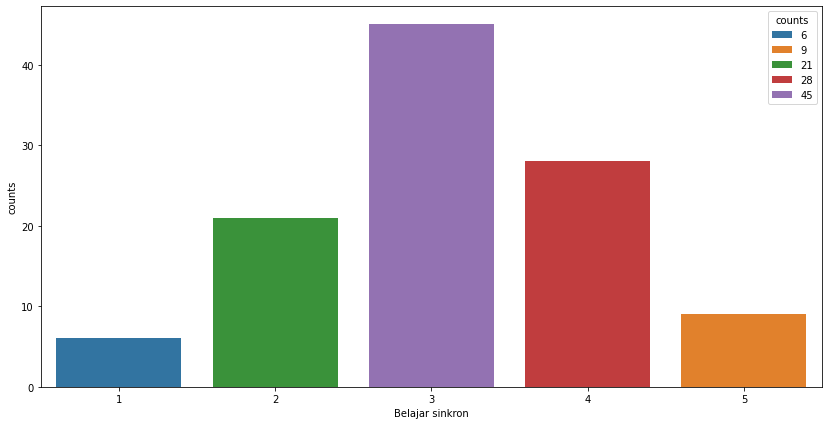

In [100]:
df1['sinkron'].value_counts()
for i in range(len(df1['sinkron'])):
  if df1['sinkron'][i] == '0 - 20 %' :
    df1['sinkron'][i] = 1
  elif df1['sinkron'][i] == '21 - 40%' :
    df1['sinkron'][i] = 2
  elif df1['sinkron'][i] == '41 - 60%' :
    df1['sinkron'][i] = 3
  elif df1['sinkron'][i] == '61 - 80%' :
    df1['sinkron'][i] = 4
  elif df1['sinkron'][i] == '81 - 100%' :
    df1['sinkron'][i] = 5
a = [int(i) for i in df1['sinkron']]
df1['sinkron_int'] = a

a = df1['sinkron'].value_counts().rename_axis('Belajar sinkron').reset_index(name='counts')
plt.figure(figsize=(14,7))
sns.barplot(x='Belajar sinkron',y='counts',data = a,hue='counts',dodge=False)

Dari grafik diatas, dapat diketahui bahwa mayoritas mahasiswa berada pada katagori 3 dalam hal belajar secara sinkron, atau tingkat pemahaman yang di dapat saat belajar dikelas. Data diatas juga bersifat mirip seperti data yang normal. Artinya data ini sangat bagus. D

### Pemrosesan kolom Frekuensi beban

In [101]:
dic_frekuensi_beban = {
    'Kategori': [str(i) for i in range(1,6)],
    'Penjelasan':['Sangat Jarang','Jarang','Sedang','Banyak','Sangat Banyak']
}
df_dic_beban = pd.DataFrame(dic_kemudahan_akses)
df_dic_beban

,Kategori,Penjelasan
0,1,Sangat sulit
1,2,Sulit
2,3,Sedang
3,4,Mudah
4,5,Sangat Mudah


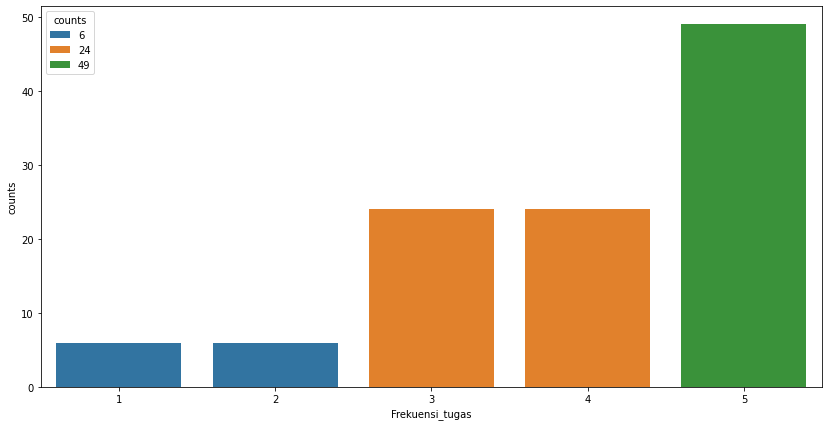

In [102]:
a = df1['frekuensi_beban'].value_counts().rename_axis('Frekuensi_tugas').reset_index(name='counts')
plt.figure(figsize=(14,7))
sns.barplot(x='Frekuensi_tugas',y='counts',data = a,hue='counts',dodge=False)

Data diatas menunjukan frekuensi pemberian tugas kepada mahasiswa. menurut mahasiswa pengisi survey, banyak yang beranggapan tugas yang diberikan sangat banyak dan sering sekali diberikan. 49 merasa sangat sering diberi tugas dengan tingkat frekuensi yang tinggi.

### Pemrosesan kolom Asinkron

In [103]:
dic_asinkron = {
    'Kategori':[str(i) for i in range(1,6)],
    'Penjelasan':['0 - 20 %','21 - 40%','41 - 60%','61 - 80%','81 - 100%']
}
df_dic_asinkron = pd.DataFrame(dic_asinkron)
df_dic_asinkron

,Kategori,Penjelasan
0,1,0 - 20 %
1,2,21 - 40%
2,3,41 - 60%
3,4,61 - 80%
4,5,81 - 100%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so w

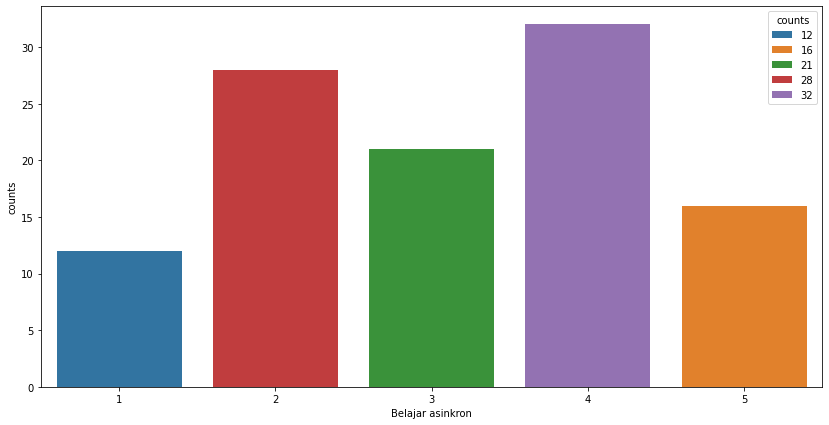

In [104]:
for i in range(len(df1['asinkron'])):
  if df1['asinkron'][i] == '0 - 20%' :
    df1['asinkron'][i] = 1
  elif df1['asinkron'][i] == '21 - 40%' :
    df1['asinkron'][i] = 2
  elif df1['asinkron'][i] == '41 - 60%' :
    df1['asinkron'][i] = 3
  elif df1['asinkron'][i] == '61 - 80%' :
    df1['asinkron'][i] = 4
  elif df1['asinkron'][i] == '81% - 100%' :
    df1['asinkron'][i] = 5
a = [int(i) for i in df1['asinkron']]
df1['asinkron_int'] = a

a = df1['asinkron'].value_counts().rename_axis('Belajar asinkron').reset_index(name='counts')
plt.figure(figsize=(14,7))
sns.barplot(x='Belajar asinkron',y='counts',data = a,hue='counts',dodge=False)

Di atas menunjukan distribusi asinkron untuk setiap katagorinya. Dari data di dapat dua puncak, artinya data terpusat di dua titik, yaitu di kategori 2 dan 4, walaupun katagori 4 memang lebih banyak. Dapat disimpulkan bahwa kurang lebih ada dua bagian, yang mana menunjukan mahasiswa merasa mudah menerima informasi saat belajar sendiri, dan ada yang tidak.

### Pemprosessan Kegiatan non-Akademik

In [105]:
dic_kegiatan_nonakademik = {
    'Katagori':[i for i in range(1,7)],
    'Penjelasan':['0 - 30 menit','31 - 60 menit','61 - 90 menit','91 - 120 menit','121 - 150 menit','151 - 180 menit']
}
df_dic_kegiatan_nonakademik = pd.DataFrame(dic_kegiatan_nonakademik)
df_dic_kegiatan_nonakademik

,Katagori,Penjelasan
0,1,0 - 30 menit
1,2,31 - 60 menit
2,3,61 - 90 menit
3,4,91 - 120 menit
4,5,121 - 150 menit
5,6,151 - 180 menit


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launc

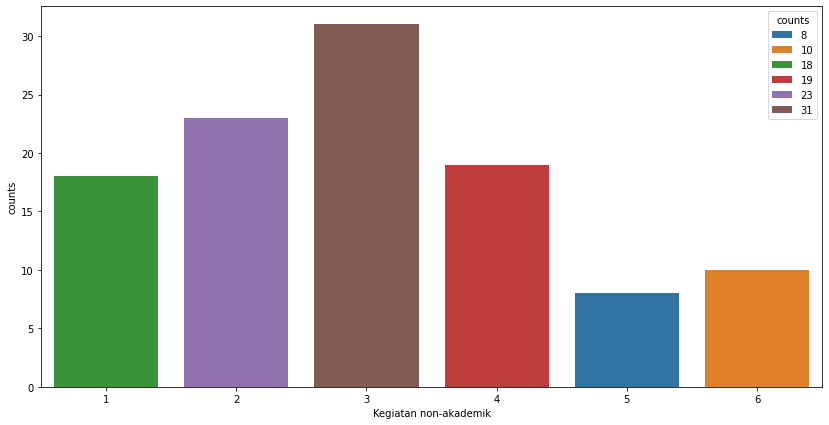

In [106]:
for i in range(len(df1['kegiatan_nonakademik'])):
  if df1['kegiatan_nonakademik'][i] == '0 - 30 menit' or df1['kegiatan_nonakademik'][i] == 'Punten gak ikut organisasi':
    df1['kegiatan_nonakademik'][i] = 1
  elif df1['kegiatan_nonakademik'][i]=='31 - 60 menit' or df1['kegiatan_nonakademik'][i]=='Tidak menentu' or df1['kegiatan_nonakademik'][i]=='4-6 jam dalam satu minggu' :
    df1['kegiatan_nonakademik'][i]=2
  elif df1['kegiatan_nonakademik'][i] == '61 - 90 menit':
    df1['kegiatan_nonakademik'][i] = 3
  elif df1['kegiatan_nonakademik'][i] == '91 - 120 menit':
    df1['kegiatan_nonakademik'][i] = 4
  elif df1['kegiatan_nonakademik'][i] == '121 - 150 menit':
    df1['kegiatan_nonakademik'][i] = 5
  elif df1['kegiatan_nonakademik'][i] == '151 - 180 menit' or  df1['kegiatan_nonakademik'][i] == 'Sisanya':
    df1['kegiatan_nonakademik'][i] = 6
a = [int(i) for i in df1['kegiatan_nonakademik']]
df1['kegiatan_nonakademik_int'] = a

a = df1['kegiatan_nonakademik'].value_counts().rename_axis('Kegiatan non-akademik').reset_index(name='counts')
plt.figure(figsize=(14,7))
sns.barplot(x='Kegiatan non-akademik',y='counts',data = a,hue='counts',dodge=False)

Data diatas menunjukan distribusi mahasiswa berdasarkan katagori terkait Kegiatan non-akademik mahasiswa. Mayoritas mahasiswa berkegiatan non-akademik selam 90-120 menit per minggunya. Data skew ke arah kanan, artinya lebih banyak mahasiswa yang berkegiatan kurang dari 90-120 menit per minggu

### Pemrosesan kolom Istirahat

In [107]:
dic_istirahat = {
    'Kategori': [str(i) for i in range(1,7)],
    'Penjelasan':['0 - 30 menit','31 - 60 menit','61 - 90 menit','91 - 120 menit','121 - 150 menit','151 - 180 menit']
}
df_dic_istirahat = pd.DataFrame(dic_istirahat)
df_dic_istirahat

,Kategori,Penjelasan
0,1,0 - 30 menit
1,2,31 - 60 menit
2,3,61 - 90 menit
3,4,91 - 120 menit
4,5,121 - 150 menit
5,6,151 - 180 menit


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launc

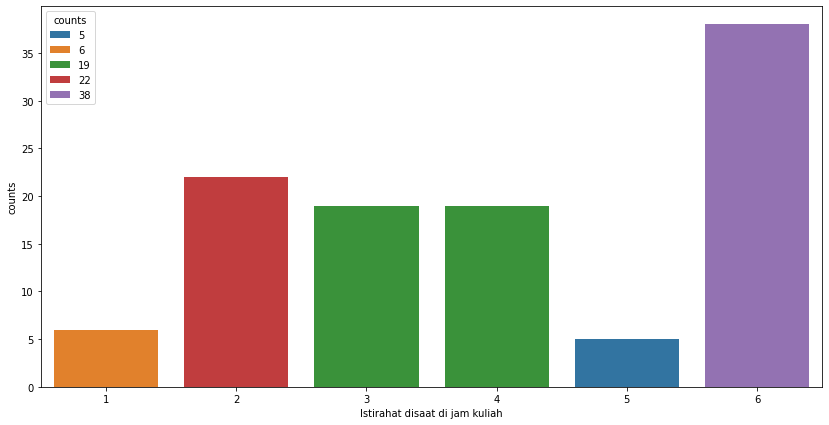

In [108]:
for i in range(len(df1['istirahat'])):
  if df1['istirahat'][i] =='0 - 30 menit'  :
    df1['istirahat'][i] = 1
  elif df1['istirahat'][i] =='31 - 60 menit' or df1['istirahat'][i] =='Tidur malam? sekitar 5 jam. Tidur siang? 31 - 60 menit.' :
    df1['istirahat'][i] = 2 
  elif df1['istirahat'][i] =='61 - 90 menit':
    df1['istirahat'][i] = 3
  elif df1['istirahat'][i] =='91 - 120 menit':
    df1['istirahat'][i] = 4
  elif df1['istirahat'][i] =='121 - 150 menit':
    df1['istirahat'][i] = 5
  elif df1['istirahat'][i] =='151 - 180 menit' or df1['istirahat'][i] =='6 jam' or df1['istirahat'][i] =='5 jam' or df1['istirahat'][i] =='Sekitar 240 menit' or df1['istirahat'][i] =='Sampe fres' or df1['istirahat'][i] =='> 180 menit' or df1['istirahat'][i] =='Selama tidak kukiah atau mengerjakan tugas' or df1['istirahat'][i] =='240-330 menit' or df1['istirahat'][i] =='4-6 jam' or df1['istirahat'][i] =='Kalau sudah cape kuliah ya istirahat' :
    df1['istirahat'][i] = 6  

      
a = df1['istirahat'].value_counts().rename_axis('Istirahat disaat di jam kuliah').reset_index(name='counts')
a.sort_values(by='Istirahat disaat di jam kuliah',inplace=True)
plt.figure(figsize=(14,7))
sns.barplot(x='Istirahat disaat di jam kuliah',y='counts',data = a,hue='counts',dodge=False)
a = [int(i) for i in df1['istirahat']]
df1['istirahat_int'] = a

Dari data di atas, mayoritas mahasiswa berada di kategori 6 dalam hal istirahat dijam kuliah(7-18:00). mayoritas dari mereka beristirahat selama 151-180 menit

In [109]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   tahun                      109 non-null    object
 1   belajar_diluar_kuliah      109 non-null    object
 2   sinkron                    109 non-null    object
 3   asinkron                   109 non-null    object
 4   kesulitan                  109 non-null    int64 
 5   frekuensi_beban            109 non-null    int64 
 6   kemudahan_akses            109 non-null    int64 
 7   kegiatan_nonakademik       109 non-null    object
 8   kuota                      109 non-null    int64 
 9   istirahat                  109 non-null    object
 10  jam_tidur                  109 non-null    object
 11  tahun_int                  109 non-null    int64 
 12  belajar_diluar_kuliah_int  109 non-null    int64 
 13  sinkron_int                109 non-null    int64 
 14  asinkron_i

## **Exploratory Data Analysis**

### Correlation

In [110]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   tahun                      109 non-null    object
 1   belajar_diluar_kuliah      109 non-null    object
 2   sinkron                    109 non-null    object
 3   asinkron                   109 non-null    object
 4   kesulitan                  109 non-null    int64 
 5   frekuensi_beban            109 non-null    int64 
 6   kemudahan_akses            109 non-null    int64 
 7   kegiatan_nonakademik       109 non-null    object
 8   kuota                      109 non-null    int64 
 9   istirahat                  109 non-null    object
 10  jam_tidur                  109 non-null    object
 11  tahun_int                  109 non-null    int64 
 12  belajar_diluar_kuliah_int  109 non-null    int64 
 13  sinkron_int                109 non-null    int64 
 14  asinkron_i

,kategori,korelasi,rank
2,kemudahan_akses,0.176611,1.0
5,belajar_diluar_kuliah_int,0.158523,2.0
6,asinkron_int,0.085427,3.0
3,kuota,0.083036,4.0
0,kesulitan,0.038764,5.0
4,tahun_int,0.029772,6.0
7,kegiatan_nonakademik_int,0.001787,7.0
8,istirahat_int,-0.005410,8.0
1,frekuensi_beban,-0.058168,9.0


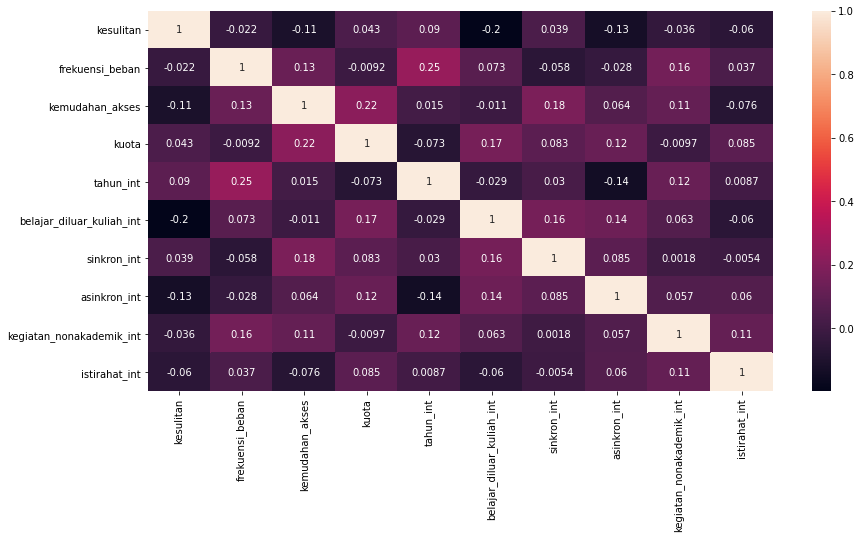

In [111]:

a = df1.corr()
plt.figure(figsize=(14,7))
sns.heatmap(df1.corr(),annot=True)
b = a['sinkron_int']
c = df1.columns
df_coef = pd.DataFrame(b,c)
df_coef.drop(['tahun','belajar_diluar_kuliah','sinkron','asinkron','jam_tidur','istirahat','kegiatan_nonakademik','sinkron_int'],inplace=True)
df_coef.reset_index(inplace=True)
df_coef.columns = ['kategori','korelasi']
df_coef['rank']=df_coef['korelasi'].rank(method='max',ascending=False)
df_coef.sort_values(by='rank')


In [112]:
dfrapi.describe()

,sinkron,tahun,belajar_diluar_kuliah,asinkron,kesulitan,frekuensi_beban,kemudahan_akses,kegiatan_nonakademik,kuota,istirahat
count,109.000000,109.00000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,3.119266,2.00000,3.458716,3.110092,2.449541,3.954128,3.614679,3.055046,3.761468,4.000000
std,0.997448,0.62361,1.524686,1.257124,0.995232,1.181535,0.999150,1.477202,1.017432,1.715938
min,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,2.00000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000
50%,3.000000,2.00000,4.000000,3.000000,2.000000,4.000000,4.000000,3.000000,4.000000,4.000000
75%,4.000000,2.00000,4.000000,4.000000,3.000000,5.000000,4.000000,4.000000,4.000000,6.000000
max,5.000000,5.00000,6.000000,5.000000,4.000000,5.000000,5.000000,6.000000,5.000000,6.000000


In [113]:
df1

,tahun,belajar_diluar_kuliah,sinkron,asinkron,kesulitan,frekuensi_beban,kemudahan_akses,kegiatan_nonakademik,kuota,istirahat,jam_tidur,tahun_int,belajar_diluar_kuliah_int,sinkron_int,asinkron_int,kegiatan_nonakademik_int,istirahat_int
0,2,4,5,5,2,3,4,6,4,6,22.00 - 23.00 WIB,2,4,5,5,6,6
1,2,2,4,2,4,3,3,3,4,3,00.00 - 01.00 WIB,2,2,4,2,3,3
2,2,1,2,1,2,4,5,3,2,6,20.00 - 21.00 WIB,2,1,2,1,3,6
3,2,5,1,5,2,4,3,3,5,6,02.00 - 03.00 WIB,2,5,1,5,3,6
4,2,6,4,5,2,5,5,6,5,4,02.00 - 03.00 WIB,2,6,4,5,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,1,3,3,4,3,4,2,2,2,2,01.00 - 02.00 WIB,1,3,3,4,2,2
105,2,4,2,5,2,5,3,3,4,4,00.00 - 01.00 WIB,2,4,2,5,3,4
106,2,4,3,3,4,3,4,3,5,3,01.00 - 02.00 WIB,2,4,3,3,3,3
107,3,5,4,3,3,4,4,3,3,2,23.00 - 00.00 WIB,3,5,4,3,3,2


In [114]:
df1.columns

Index(['tahun', 'belajar_diluar_kuliah', 'sinkron', 'asinkron', 'kesulitan',
       'frekuensi_beban', 'kemudahan_akses', 'kegiatan_nonakademik', 'kuota',
       'istirahat', 'jam_tidur', 'tahun_int', 'belajar_diluar_kuliah_int',
       'sinkron_int', 'asinkron_int', 'kegiatan_nonakademik_int',
       'istirahat_int'],
      dtype='object')

In [115]:
drapi = df1[['sinkron','tahun','belajar_diluar_kuliah','asinkron','kesulitan','frekuensi_beban','kemudahan_akses','kegiatan_nonakademik','kuota','istirahat']]
df_coef.columns = df_coef.columns.str.replace('_int','')
drapi

,sinkron,tahun,belajar_diluar_kuliah,asinkron,kesulitan,frekuensi_beban,kemudahan_akses,kegiatan_nonakademik,kuota,istirahat
0,5,2,4,5,2,3,4,6,4,6
1,4,2,2,2,4,3,3,3,4,3
2,2,2,1,1,2,4,5,3,2,6
3,1,2,5,5,2,4,3,3,5,6
4,4,2,6,5,2,5,5,6,5,4
...,...,...,...,...,...,...,...,...,...,...
104,3,1,3,4,3,4,2,2,2,2
105,2,2,4,5,2,5,3,3,4,4
106,3,2,4,3,4,3,4,3,5,3
107,4,3,5,3,3,4,4,3,3,2


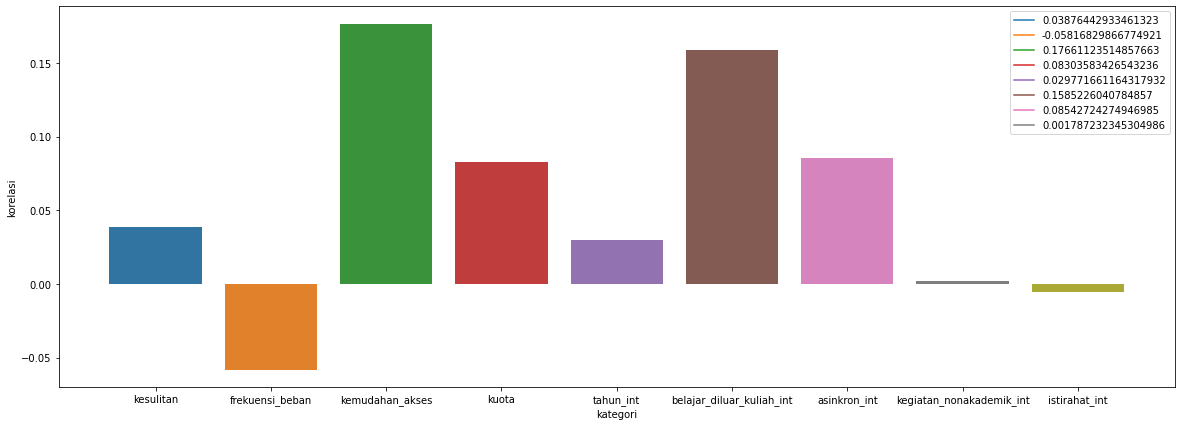

In [116]:
plt.figure(figsize=(20,7))
sns.barplot(x='kategori',y='korelasi',data=df_coef)
a = [i for i in df_coef['kategori']]
b = [float(i) for i in df_coef['korelasi']]

for i in range(8):
  plt.plot(0,0,label=str(b[i]))
  plt.legend()


Diatas diketahui nilai korelasi masing-masing variable terhadap variable sinkron

### Data

In [117]:
# Data lama
df

,Timestamp,Nama (Inisial),Jenis Kelamin,Fakultas/Jurusan (Untuk TPB ITB isi jurusan dengan TPB ITB),Tahun ke berapa di kuliah?,Asal Universitas,Domisili,Berapa lama Anda menghabiskan waktu untuk belajar dalam sehari selain pada waktu kuliah?,"Berapa persen materi yang diberikan saat pembelajaran sinkron yang disimak oleh Anda? (Pembelajaran tatap muka, contoh : gmeet, webinar, dll)","Berapa persen materi yang diberikan saat pembelajaran asinkron yang disimak oleh Anda? (Pembelajaran mandiri tanpa ada interaksi langsung dengan pemateri, contoh : video youtube, modul perkuliahan)",Seberapa sulit materi kuliah yang diberikan?,Seberapa sering diberikan Tugas/PR/Kuis?,Seberapa mudah akses materi perkuliahan lewat platform LMS?,Berapa lama dalam sehari Anda melakukan kegiatan di luar akademik? (Kegiatan organisasi baik di UKM atau himpunan),Apakah ketersediaan kuota/Internet cukup memadai untuk menunjang kegiatan pembelajaran?,Berapa lama Anda menghabiskan waktu untuk istirahat dalam sehari saat waktu kuliah,Pada jam berapa Anda biasanya tidur di waktu malam saat waktu kuliah?
0,05/11/2020 17:08:11,Ria,Perempuan,Matematika,2,ITB,Jawa Tengah,91 - 120 menit,81 - 100%,81% - 100%,2,3,4,151 - 180 menit,4,151 - 180 menit,22.00 - 23.00 WIB
1,05/11/2020 17:08:17,b,Laki-laki,FMIPA/Aktuaria,2,ITB,Jakarta,31 - 60 menit,61 - 80%,21 - 40%,4,3,3,61 - 90 menit,4,61 - 90 menit,00.00 - 01.00 WIB
2,05/11/2020 17:09:29,danzel,Laki-laki,Matematika,2,ITB,Cimahi,0 - 30 menit,21 - 40%,0 - 20%,2,4,5,61 - 90 menit,2,151 - 180 menit,20.00 - 21.00 WIB
3,05/11/2020 17:11:28,hfy,Perempuan,Aktuaria,2,ITB,Bandung,121 - 150 menit,0 - 20 %,81% - 100%,2,4,3,61 - 90 menit,5,151 - 180 menit,02.00 - 03.00 WIB
4,05/11/2020 17:16:53,AP,Laki-laki,FTTM/TG,2,ITB,"Denpasar, Bali",151 - 180 menit,61 - 80%,81% - 100%,2,5,5,151 - 180 menit,5,91 - 120 menit,02.00 - 03.00 WIB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,09/11/2020 7:38:14,T,Laki-laki,FMIPA/Tpb itb,1,Itb,Inderapura,61 - 90 menit,41 - 60%,61 - 80%,3,4,2,31 - 60 menit,2,31 - 60 menit,01.00 - 02.00 WIB
105,09/11/2020 11:34:33,Fayez Gatri,Laki-laki,FTMD/Teknik Mesin,2,Institut Teknologi Bandung,Tangerang Selatan,91 - 120 menit,21 - 40%,81% - 100%,2,5,3,61 - 90 menit,4,91 - 120 menit,00.00 - 01.00 WIB
106,09/11/2020 16:37:58,VH,Laki-laki,FMIPA/Aktuaria,2,ITB,Pontianak,91 - 120 menit,41 - 60%,41 - 60%,4,3,4,61 - 90 menit,5,61 - 90 menit,01.00 - 02.00 WIB
107,09/11/2020 16:48:59,Agung,Laki-laki,JTEIF/IF,3,ITERA,Bandar Lampung,121 - 150 menit,61 - 80%,41 - 60%,3,4,4,61 - 90 menit,3,31 - 60 menit,23.00 - 00.00 WIB


In [118]:
drapi

,sinkron,tahun,belajar_diluar_kuliah,asinkron,kesulitan,frekuensi_beban,kemudahan_akses,kegiatan_nonakademik,kuota,istirahat
0,5,2,4,5,2,3,4,6,4,6
1,4,2,2,2,4,3,3,3,4,3
2,2,2,1,1,2,4,5,3,2,6
3,1,2,5,5,2,4,3,3,5,6
4,4,2,6,5,2,5,5,6,5,4
...,...,...,...,...,...,...,...,...,...,...
104,3,1,3,4,3,4,2,2,2,2
105,2,2,4,5,2,5,3,3,4,4
106,3,2,4,3,4,3,4,3,5,3
107,4,3,5,3,3,4,4,3,3,2


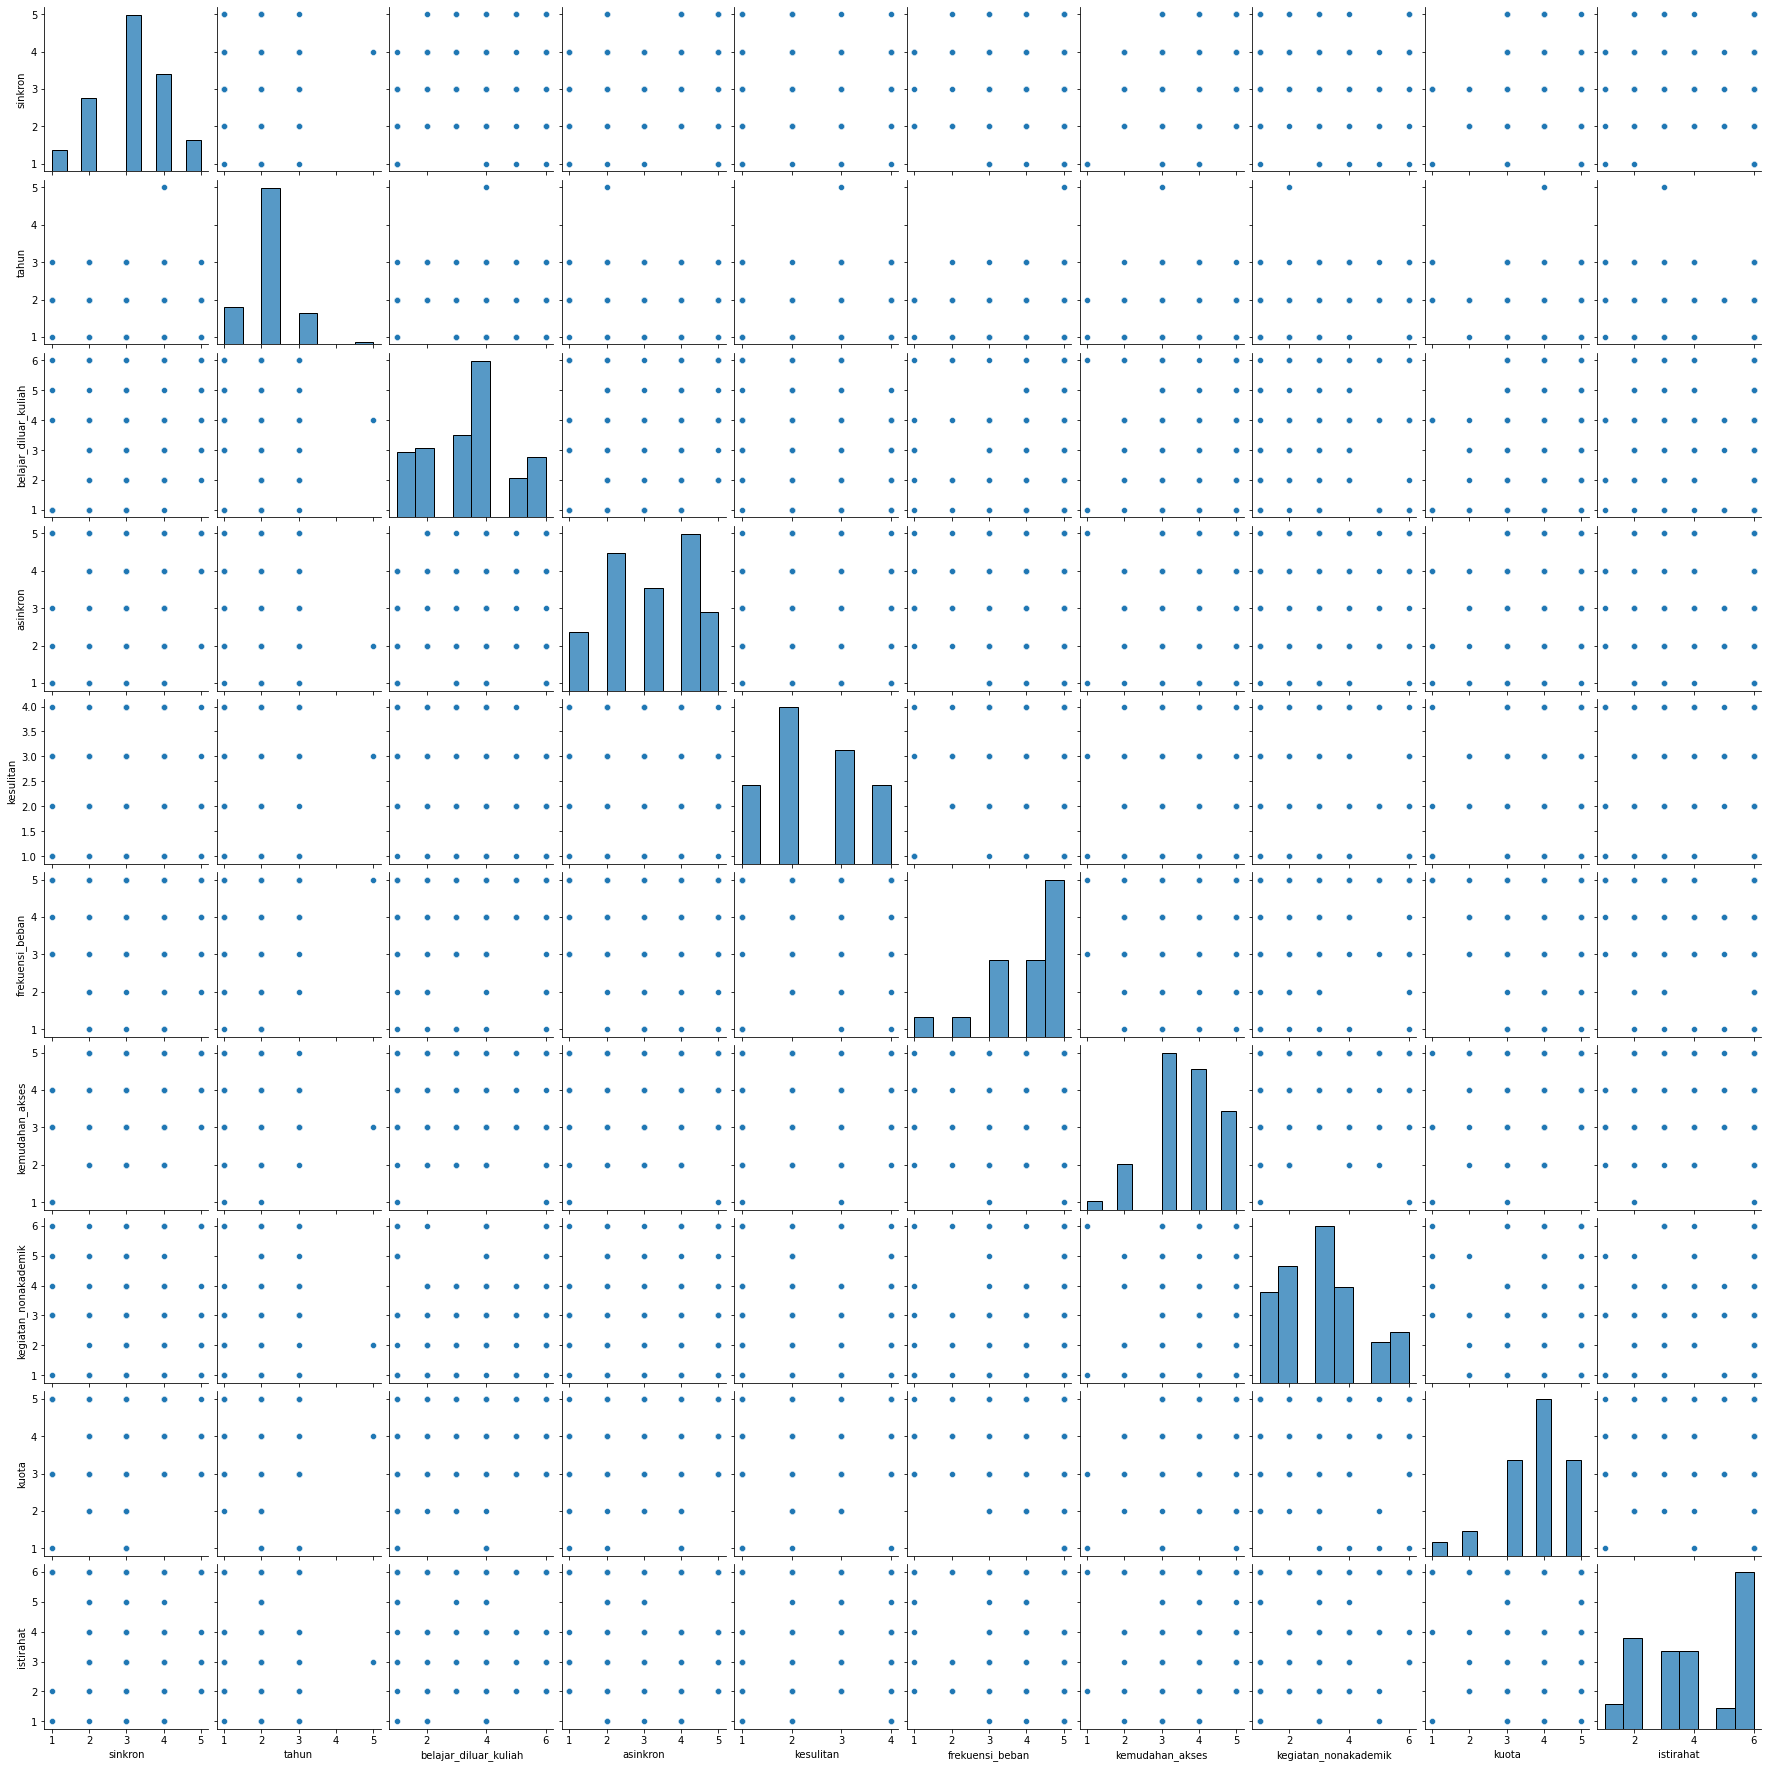

In [119]:
sns.pairplot(drapi)

## **Machine Learning**

### Regression

In [120]:
df_coef

,kategori,korelasi,rank
0,kesulitan,0.038764,5.0
1,frekuensi_beban,-0.058168,9.0
2,kemudahan_akses,0.176611,1.0
3,kuota,0.083036,4.0
4,tahun_int,0.029772,6.0
5,belajar_diluar_kuliah_int,0.158523,2.0
6,asinkron_int,0.085427,3.0
7,kegiatan_nonakademik_int,0.001787,7.0
8,istirahat_int,-0.005410,8.0


In [121]:
dfrapi = drapi.astype(int)
dfrapi

,sinkron,tahun,belajar_diluar_kuliah,asinkron,kesulitan,frekuensi_beban,kemudahan_akses,kegiatan_nonakademik,kuota,istirahat
0,5,2,4,5,2,3,4,6,4,6
1,4,2,2,2,4,3,3,3,4,3
2,2,2,1,1,2,4,5,3,2,6
3,1,2,5,5,2,4,3,3,5,6
4,4,2,6,5,2,5,5,6,5,4
...,...,...,...,...,...,...,...,...,...,...
104,3,1,3,4,3,4,2,2,2,2
105,2,2,4,5,2,5,3,3,4,4
106,3,2,4,3,4,3,4,3,5,3
107,4,3,5,3,3,4,4,3,3,2


In [122]:
# LinearRegression
import sklearn


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

X = dfrapi[['kemudahan_akses','belajar_diluar_kuliah','asinkron','kuota','kesulitan','frekuensi_beban']]
#X = drapi.drop('sinkron',axis=1)
X_train,X_test,Y_train,Y_test = train_test_split(X,dfrapi.sinkron,random_state=0,test_size=20)

lreg = LinearRegression(normalize=True,fit_intercept=True)
lreg.fit(X_train,Y_train)

pred_train = lreg.predict(X_train)
pred_test  = lreg.predict(X_test)

pred_train = [i for i in pred_train]
pred_test  = [i for i in pred_test]

train = mse(pred_train,Y_train)
test  = mse(pred_test,Y_test)
print(train,test)

0.9731252828658381 0.6713430090759609


Di pilih beberapa variable untuk menjadi dependent variable. Untuk memprediksi model

In [123]:
X.shape

(109, 6)

In [124]:
np.mean((Y_train-pred_train)**2)

0.973125282865838

In [125]:
a = np.mean((pred_test-Y_test)**2)
print('MSE = ',a,)

MSE =  0.671343009075961


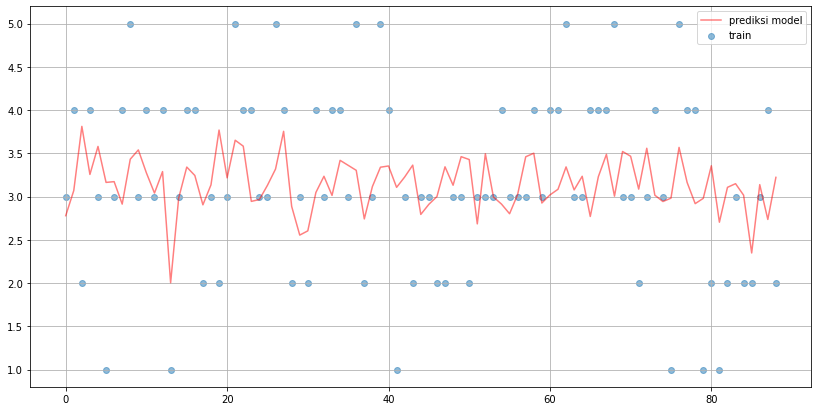

In [126]:
a,b = X_train.shape
xline_train = np.arange(0,a,1)

plt.figure(figsize=(14,7))
plt.scatter(np.array(xline_train),np.array(Y_train),alpha=0.5,label='train')
plt.plot(np.array(xline_train),np.array(pred_train),c='r',alpha=0.5,label='prediksi model')
plt.grid()
plt.legend()

MSE :  0.671343009075961


0.671343009075961

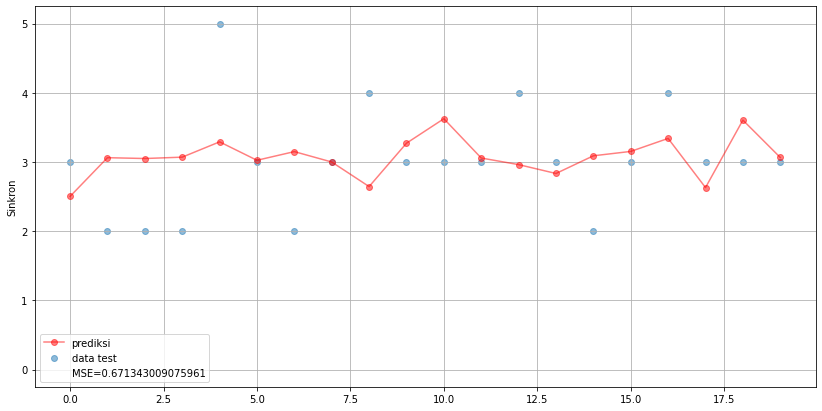

In [127]:
a,b = X_test.shape
xline_test = np.arange(0,a,1)

plt.figure(figsize=(14,7))
plt.scatter(np.array(xline_test),np.array(Y_test),alpha=0.5,label='data test')
plt.plot(np.array(xline_test),np.array(pred_test),c='r',alpha=0.5,label='prediksi',marker='o')
plt.scatter(0,0,alpha=0,label='MSE'+'='+str(np.mean((pred_test-Y_test)**2)))
plt.ylabel('Sinkron')
plt.grid()
plt.legend(loc=3)

print('MSE : ',np.mean((pred_test-Y_test)**2))
jumlah = 0
pred = np.array(pred_test)
asli = np.array(Y_test)

for i in range(len(pred_test)):
  jumlah += (pred[i]-asli[i])**2
jumlah = jumlah/len(pred_test)
jumlah

Diatas merupakan hasil Prediksi dari model kita, menggunakan pendekatan Multivariate Regression. MSE: 0.5

#### Residual

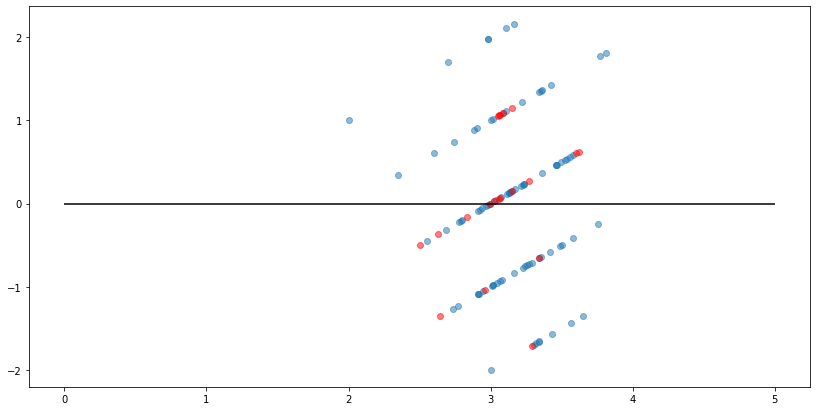

In [128]:
plt.figure(figsize=(14,7))
train_plot = plt.scatter(pred_train,(pred_train-Y_train),alpha=0.5)
plot   = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)


plt.hlines(y=0,xmin=0,xmax=5)
#plt.subplots(1,2,1)
train_residu = np.mean(pred_train-Y_train)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


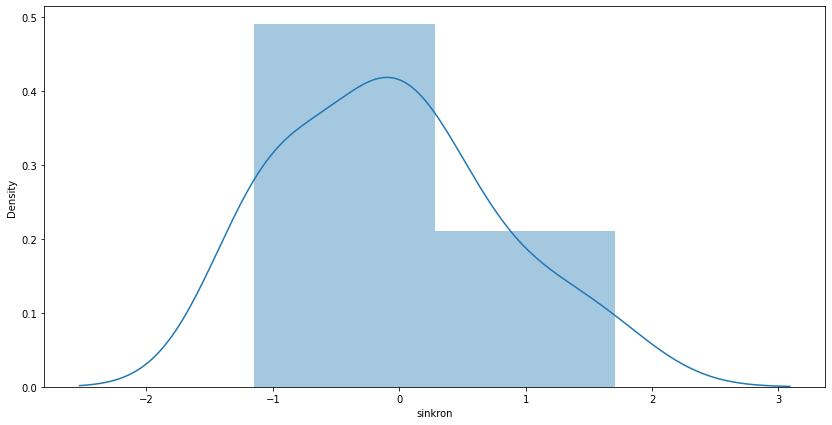

In [129]:
plt.figure(figsize=(14,7))
sns.distplot((Y_test-pred_test))

Di atas merupakan plot dari residu, residu = error dari prediksi... jadi jika residu mendekati 0, maka model dinilai baik, akan tetapi model kita belum seperti itu. Lalu, dibawahnya ada distribusi dari residu, jika berbentuk mendekati distribusi normal, makan algoritma regressi bisa di gunakan

#### Predictor

In [130]:
df_dic_sinkron.columns

Index(['Kategori', 'Penjelasan'], dtype='object')

In [131]:
def fpredict(a):
  return df_dic_sinkron.loc[df_dic_sinkron['Kategori']==a]
  
X.columns

Index(['kemudahan_akses', 'belajar_diluar_kuliah', 'asinkron', 'kuota',
       'kesulitan', 'frekuensi_beban'],
      dtype='object')

In [132]:
objek = [2,3,4,1,2,1]
a = np.array([objek])

In [133]:
predict = str(int(lreg.predict(a)))
print(fpredict(predict))

  Kategori Penjelasan
1        2   21 - 40%


In [134]:
corr = lreg.intercept_
coef = lreg.coef_
prediksi = 0
for i in range(6):
  prediksi += objek[i]*coef[i]
prediksi = prediksi + lreg.intercept_
prediksi
print(lreg.coef_,lreg.intercept_)

[ 0.23866131  0.13785425  0.01595869 -0.01461975  0.10155604 -0.0244    ] 1.6458559307946186


In [135]:
predict_ = str(int(lreg.predict(a)))
print(fpredict(predict))

  Kategori Penjelasan
1        2   21 - 40%


In [136]:
X.columns

Index(['kemudahan_akses', 'belajar_diluar_kuliah', 'asinkron', 'kuota',
       'kesulitan', 'frekuensi_beban'],
      dtype='object')

10.120437473614711
0.8537647164420812


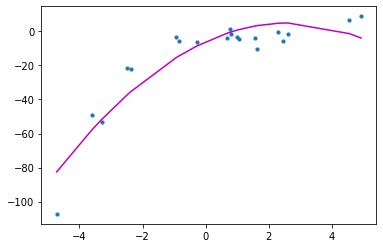

array([[ -53.46841187],
       [  -1.26255958],
       [  -3.50619264],
       [-107.22320039],
       [ -49.13195018],
       [   8.90122353],
       [  -5.46624176],
       [  -5.76263165],
       [  -0.60058568],
       [   1.2226779 ],
       [  -3.95663744],
       [ -21.98989452],
       [  -6.11812275],
       [ -10.46843964],
       [  -4.11955719],
       [  -3.02941914],
       [ -21.76152272],
       [  -1.51295226],
       [  -4.75491157],
       [   6.50723268]])

In [137]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()
y


#### KNN Regressor

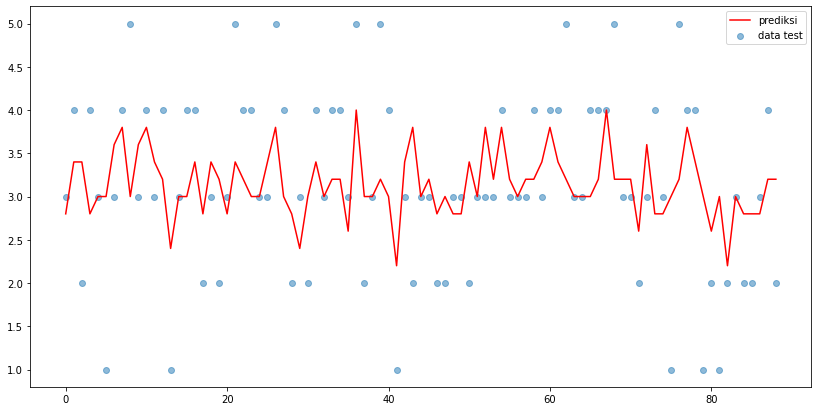

In [138]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_train, Y_train)
y = neigh.predict(X_train)

plt.figure(figsize=(14,7))
plt.scatter(np.array(xline_train),np.array(Y_train),alpha=0.5,label='data test')
plt.plot(np.array(xline_train),y,c='r',label='prediksi')
#plt.scatter(0,0,alpha=0,label=str(mse(Y_test,y)))
plt.legend()


  Kategori Penjelasan
1        2   21 - 40%


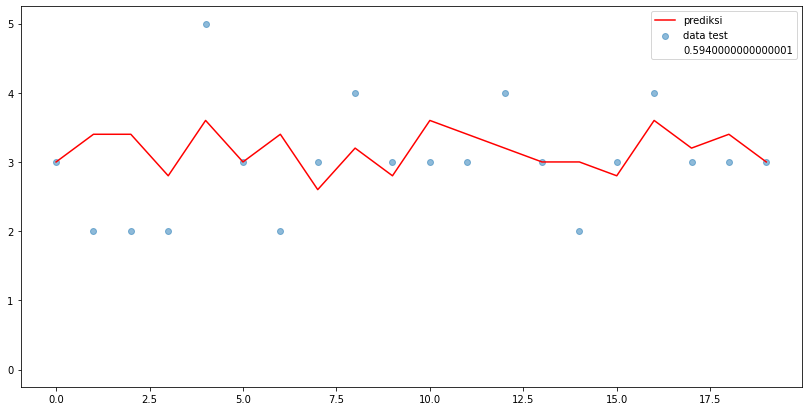

In [139]:
y = neigh.predict(X_test)
plt.figure(figsize=(14,7))
plt.scatter(np.array(xline_test),np.array(Y_test),alpha=0.5,label='data test')
plt.plot(np.array(xline_test),y,c='r',label='prediksi')
plt.scatter(0,0,alpha=0,label=str(mse(Y_test,y)))
plt.legend()
predict = str(int(neigh.predict(a)))
print(fpredict(predict))

Regressi menggunakan KNN-Regressor merupakan model yang cukup baik, lebih baik dari pada model lain. karena memiliki mse yang sedikit

#### DecesionTree Regressor

In [140]:
from sklearn.tree import DecisionTreeRegressor


In [141]:
#Multivariate Polynomial Regression
dtreg = DecisionTreeRegressor(random_state=0,max_leaf_nodes=5)
dtreg.fit(X_train,Y_train)

y_dt_pred = dtreg.predict(X_test)

mse(Y_test,y_dt_pred)

0.662629135802469

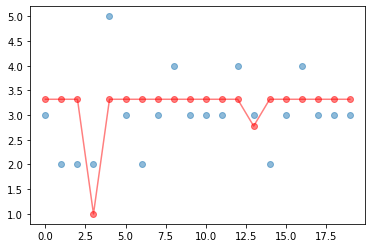

In [142]:
plt.scatter(np.array(xline_test),np.array(Y_test),alpha=0.5,label='data test')
plt.plot(np.array(xline_test),np.array(y_dt_pred),c='r',alpha=0.5,label='prediksi',marker='o')

#### K MEANS

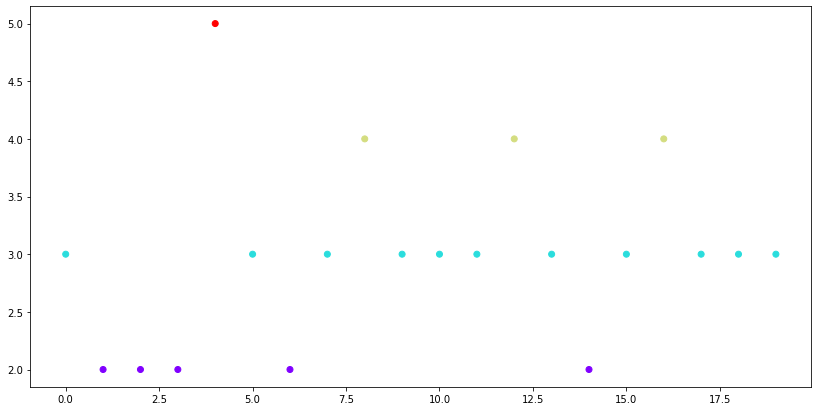

In [143]:
plt.figure(figsize=(14,7))
a,b = X_test.shape
xmeans_line = np.arange(0,a,1)
plt.scatter(xmeans_line,np.array(Y_test),label='train',c=Y_test,cmap='rainbow')

In [144]:
from sklearn.cluster import KMeans

In [145]:
kmeans = KMeans(n_clusters = 5)

In [146]:

kmeans.fit(X_test)
kmeans.cluster_centers_

array([[4.66666667, 5.        , 2.33333333, 4.66666667, 1.33333333,
        4.66666667],
       [4.22222222, 1.88888889, 2.22222222, 3.44444444, 2.33333333,
        4.33333333],
       [3.33333333, 4.        , 4.        , 3.66666667, 1.66666667,
        4.66666667],
       [2.        , 2.        , 2.5       , 4.        , 2.5       ,
        2.5       ],
       [4.33333333, 2.66666667, 3.66666667, 4.        , 1.66666667,
        2.        ]])

array([3, 1, 1, 1, 4, 2, 4, 2, 3, 1, 0, 1, 1, 1, 0, 2, 1, 1, 0, 4],
      dtype=int32)

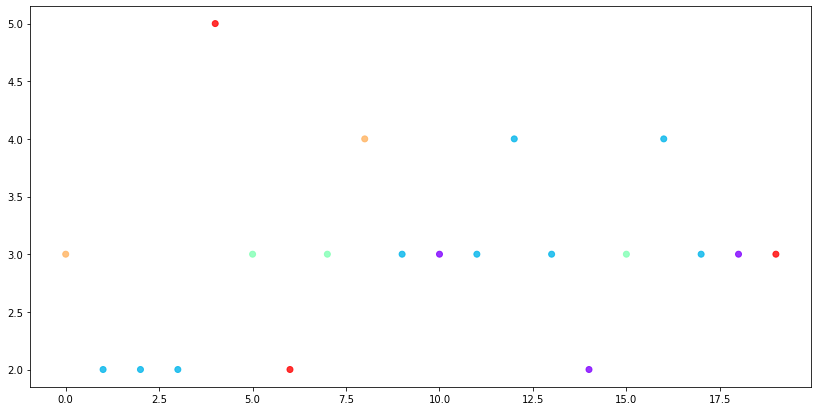

In [147]:
plt.figure(figsize=(14,7))
ymeans_predict=kmeans.labels_
plt.scatter(xmeans_line,np.array(Y_test),alpha=0.8,label='train',c=ymeans_predict,cmap='rainbow')
kmeans.labels_

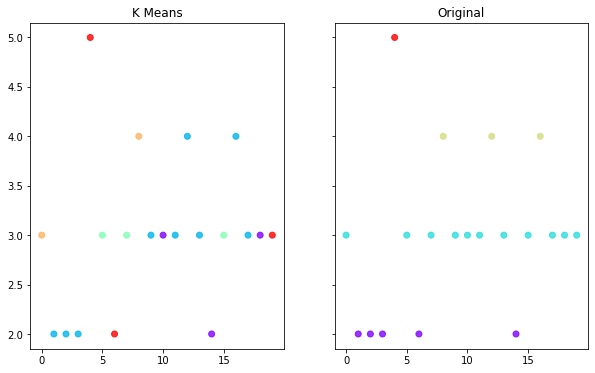

In [148]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(10,6))

ax1.set_title('K Means')
ax1.scatter(xmeans_line,np.array(Y_test),alpha=0.8,label='train',c=ymeans_predict,cmap='rainbow')

ax2.set_title('Original')
ax2.scatter(xmeans_line,np.array(Y_test),label='train',c=Y_test,cmap='rainbow',alpha=0.8)

Di atas merupakan hasil dari KMEANS, kita bisa lihat bahwa algoritma belum mampu memprediksi secara baik dari label data (sinkron)

In [149]:
pred = ymeans_predict + 1
pred

array([4, 2, 2, 2, 5, 3, 5, 3, 4, 2, 1, 2, 2, 2, 1, 3, 2, 2, 1, 5],
      dtype=int32)

In [150]:
real = np.array(Y_test)
real

array([3, 2, 2, 2, 5, 3, 2, 3, 4, 3, 3, 3, 4, 3, 2, 3, 4, 3, 3, 3])

In [151]:
dic ={
    'real_' : real,
    'pred_' : ymeans_predict + 1 
}

df_val = pd.DataFrame(dic)
a = []
for i in range(len(df_val.real_)):
  if df_val.real_[i] == df_val.pred_[i]:
    b = 1
    a.append(b)
  else :
    b = 0
    a.append(b)
df_val['score']= [int(i) for i in a]
df_val

df_val.mean()

real_    3.00
pred_    2.65
score    0.40
dtype: float64

In [152]:
df_val[50:108]

,real_,pred_,score
